# プーリング処理を見てみる

畳み込み処理では、フィルター（カーネル）を用いて画像の特徴を抽出するため、平滑化やエッジ抽出などの特徴が可視化できていたのに対し、プーリング処理は直感的に特徴を可視化できません。というのもプーリング処理はどちらかというと特徴マップの空間サイズを小さくすることで、計算量を削減しする役割が一般的だからです。つまりできるだけ特徴をそのままにしつつ小さくすることが本質的になってきます。

よって今から、最大プーリング（MaxPooling）と平均プーリング（AveragePooling）を行い、元画像と比べて縮小されているかを確認してみましょう

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms

def max_pooling(image, pool_size=(2, 2)):
    input_tensor = torch.from_numpy(image).permute(2, 0, 1).unsqueeze(0).float()
    pooled_tensor = torch.nn.functional.max_pool2d(input_tensor, kernel_size=pool_size)
    pooled_image = pooled_tensor.squeeze(0).permute(1, 2, 0).numpy()
    return pooled_image

def avg_pooling(image, pool_size=(2, 2)):
    input_tensor = torch.from_numpy(image).permute(2, 0, 1).unsqueeze(0).float()
    pooled_tensor = torch.nn.functional.avg_pool2d(input_tensor, kernel_size=pool_size)
    pooled_image = pooled_tensor.squeeze(0).permute(1, 2, 0).numpy()
    return pooled_image

def apply_pooling(input_image_path, max_pool_output_path, avg_pool_output_path):
    input_image = Image.open(input_image_path)
    input_image = np.array(input_image)

    max_pooled_image = max_pooling(input_image)
    avg_pooled_image = avg_pooling(input_image)

    max_pooled_image = Image.fromarray(np.uint8(max_pooled_image))
    avg_pooled_image = Image.fromarray(np.uint8(avg_pooled_image))

    max_pooled_image.save(max_pool_output_path)
    avg_pooled_image.save(avg_pool_output_path)

input_image_path = 'sample.jpg' # 入力画像のパスを指定してください。
max_pool_output_path = 'max_pooled_output.jpg'
avg_pool_output_path = 'avg_pooled_output.jpg'

apply_pooling(input_image_path, max_pool_output_path, avg_pool_output_path)



In [5]:
import numpy as np
from PIL import Image
import torch
import torchvision.transforms as transforms

def max_pooling(image, pool_size=(2, 2)):
    input_tensor = torch.from_numpy(image).permute(2, 0, 1).unsqueeze(0).float()
    pooled_tensor = torch.nn.functional.max_pool2d(input_tensor, kernel_size=pool_size)
    pooled_image = pooled_tensor.squeeze(0).permute(1, 2, 0).numpy()
    return pooled_image

def avg_pooling(image, pool_size=(2, 2)):
    input_tensor = torch.from_numpy(image).permute(2, 0, 1).unsqueeze(0).float()
    pooled_tensor = torch.nn.functional.avg_pool2d(input_tensor, kernel_size=pool_size)
    pooled_image = pooled_tensor.squeeze(0).permute(1, 2, 0).numpy()
    return pooled_image

def concatenate_images(image1, image2, image3):
    images = [image1, image2, image3]
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)
    new_im = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset, 0))
        x_offset += im.size[0]

    return new_im

def apply_pooling(input_image_path, max_pool_output_path, avg_pool_output_path, concatenated_output_path):
    input_image = Image.open(input_image_path)
    input_image_np = np.array(input_image)

    max_pooled_image = max_pooling(input_image_np)
    avg_pooled_image = avg_pooling(input_image_np)

    max_pooled_image = Image.fromarray(np.uint8(max_pooled_image))
    avg_pooled_image = Image.fromarray(np.uint8(avg_pooled_image))

    concatenated_image = concatenate_images(input_image, max_pooled_image, avg_pooled_image)
    concatenated_image.save(concatenated_output_path)

input_image_path = 'sample.jpg' # 入力画像のパスを指定してください。
max_pool_output_path = 'max_pooled_output.jpg'
avg_pool_output_path = 'avg_pooled_output.jpg'
concatenated_output_path = 'concatenated_output.jpg'

apply_pooling(input_image_path, max_pool_output_path, avg_pool_output_path, concatenated_output_path)


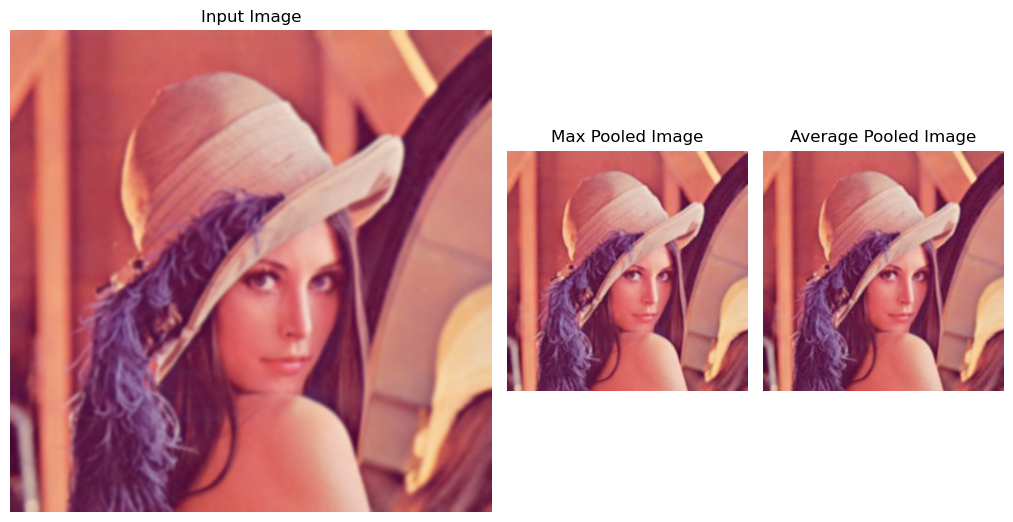

In [6]:
import matplotlib.gridspec as gridspec

def display_images(input_image_path, max_pool_output_path, avg_pool_output_path):
    input_image = Image.open(input_image_path)
    max_pooled_image = Image.open(max_pool_output_path)
    avg_pooled_image = Image.open(avg_pool_output_path)

    widths = [input_image.width, max_pooled_image.width, avg_pooled_image.width]
    fig_width = sum(widths) / 100
    fig_height = max(input_image.height, max_pooled_image.height, avg_pooled_image.height) / 100

    fig = plt.figure(figsize=(fig_width, fig_height))
    gs = gridspec.GridSpec(1, 3, width_ratios=widths)
    axs = [plt.subplot(gs[i]) for i in range(3)]

    axs[0].imshow(input_image, aspect='equal')
    axs[0].set_title('Input Image')
    axs[0].axis('off')

    axs[1].imshow(max_pooled_image, aspect='equal')
    axs[1].set_title('Max Pooled Image')
    axs[1].axis('off')

    axs[2].imshow(avg_pooled_image, aspect='equal')
    axs[2].set_title('Average Pooled Image')
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()

display_images(input_image_path, max_pool_output_path, avg_pool_output_path)
